In [1]:
import pandas as pd

# Load data with the help already available dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    'status', 'duration', 'credit_history', 'purpose', 'amount',
    'savings', 'employment', 'installment_rate', 'personal_status',
    'other_debtors', 'residence_since', 'property', 'age',
    'other_installment_plans', 'housing', 'number_credits',
    'job', 'people_liable', 'telephone', 'foreign_worker', 'target'
]

df = pd.read_csv(url, sep=' ', header=None, names=columns)

# Convert target: 1 = good credit, 2 = bad credit
df['target'] = df['target'].map({1: 0, 2: 1})  # 1 = default

df.head()


,status,duration,credit_history,purpose,amount,savings,employment,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,target
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,0
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,1
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,0
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,0
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,1


In [2]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nTarget Class Distribution:\n", df['target'].value_counts())

Shape: (1000, 21)

Data Types:
 status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment                 object
installment_rate            int64
personal_status            object
other_debtors              object
residence_since             int64
property                   object
age                         int64
other_installment_plans    object
housing                    object
number_credits              int64
job                        object
people_liable               int64
telephone                  object
foreign_worker             object
target                      int64
dtype: object

Target Class Distribution:
 target
0    700
1    300
Name: count, dtype: int64


In [7]:
#preprocessing
from sklearn.preprocessing import LabelEncoder

# Automatically label encode categorical features
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


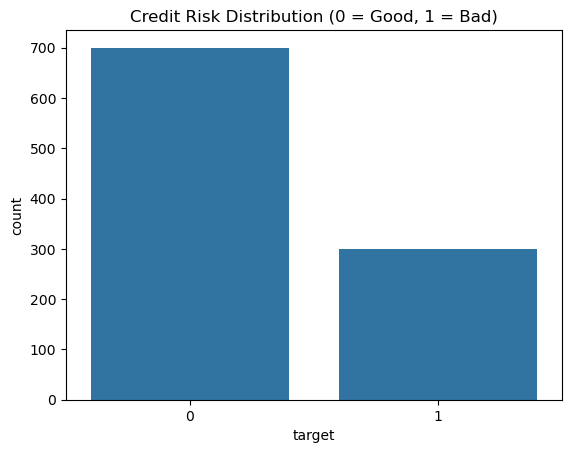

In [11]:
#target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title("Credit Risk Distribution (0 = Good, 1 = Bad)")
plt.show()


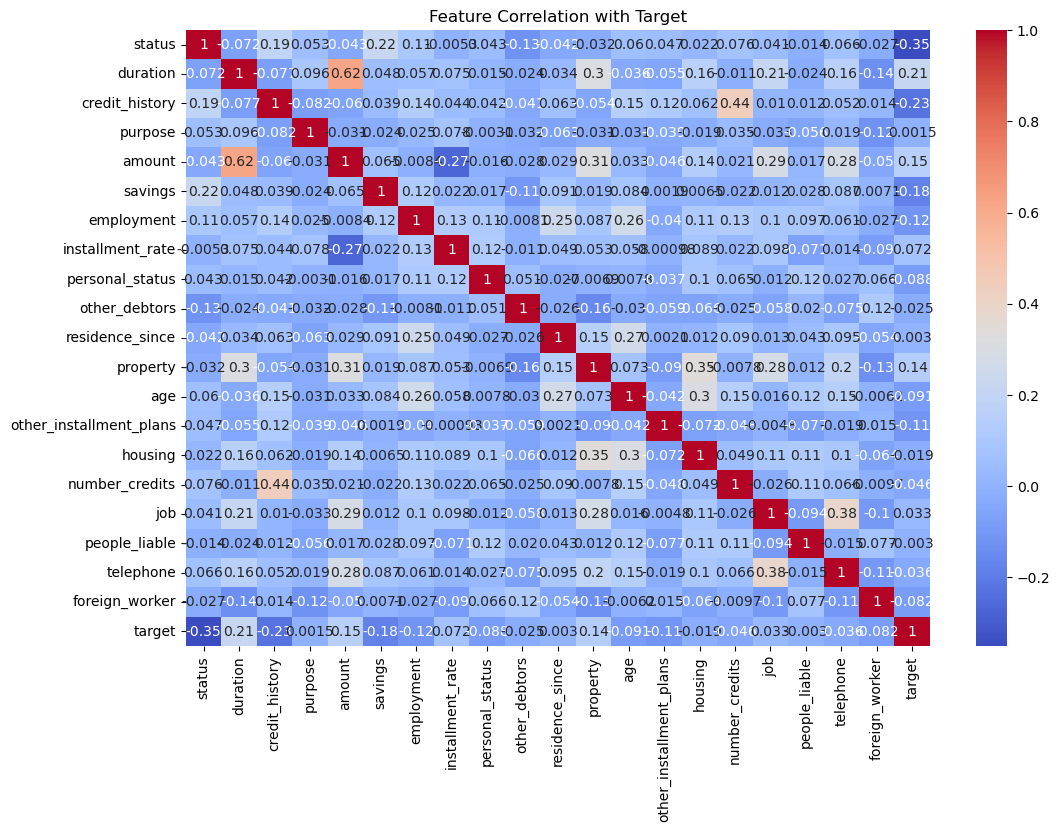

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Target")
plt.show()

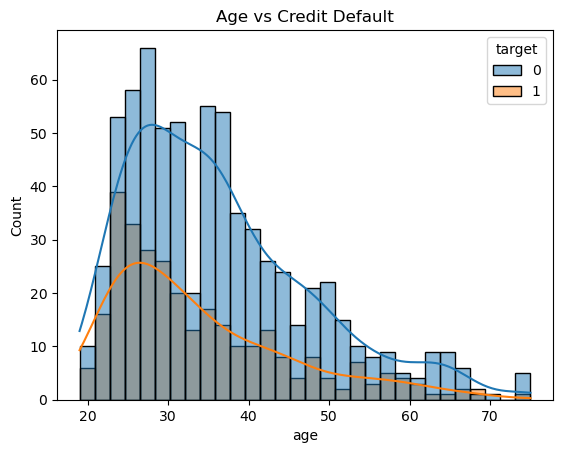

In [15]:
#comparison of credit risk wrt age
sns.histplot(data=df, x='age', hue='target', bins=30, kde=True)
plt.title("Age vs Credit Default")
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print("Logistic Regression Performance:\n")
print(classification_report(y_test, y_pred))

Logistic Regression Performance:

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       140
           1       0.63      0.53      0.58        60

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       140
           1       0.70      0.43      0.54        60

    accuracy                           0.78       200
   macro avg       0.75      0.68      0.69       200
weighted avg       0.76      0.78      0.76       200



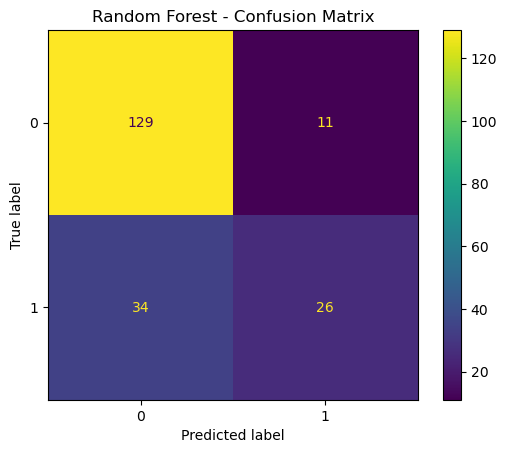

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - Confusion Matrix")
plt.show()

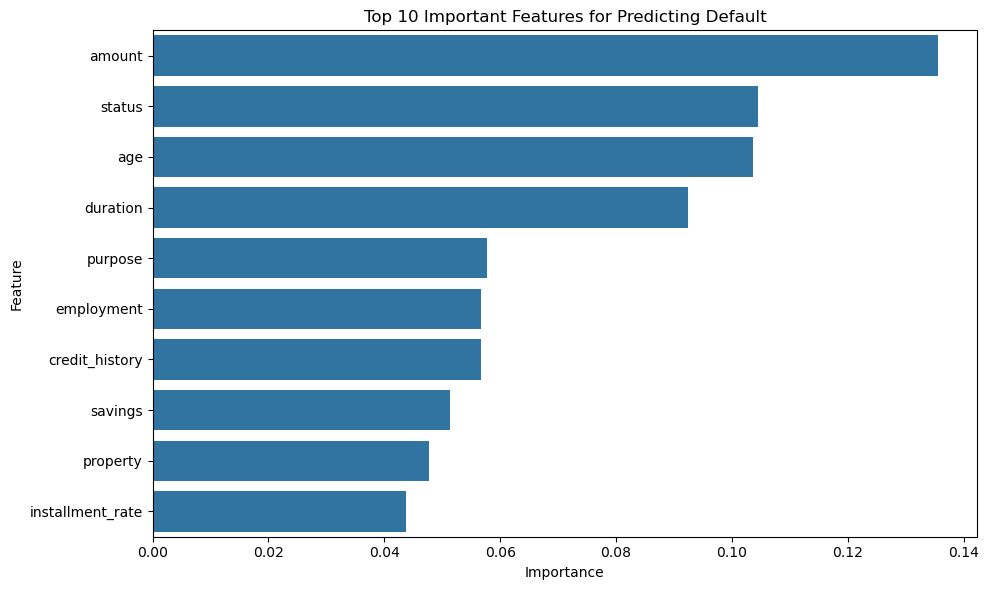

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature importance from Random Forest
importances = rf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(10))
plt.title("Top 10 Important Features for Predicting Default")
plt.tight_layout()
plt.show()
